# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

**importaré las librerías, posterior a ello voy a imprimir el head de cada uno de los dataframes para verificar en que formato vienen y si es necesario añadir un separador diferente al predeterminado**

In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders=pd.read_csv('/datasets/instacart_orders.csv',sep=';')
products=pd.read_csv('/datasets/products.csv',sep=';')
aisles=pd.read_csv('/datasets/aisles.csv',sep=';')
departments=pd.read_csv('/datasets/departments.csv',sep=';')
order_products=pd.read_csv('/datasets/order_products.csv',sep=';')


In [3]:
# mostrar información del DataFrame
#print(orders.head(5))
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
#print(products.head(5))
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
#print(aisles.head(5))
aisles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
#print(departments.head(5))
departments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
#print(order_products.head(5))
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


###  ***Añadido por el estudiante ***
**Proceso para investigar el motivo por el cual los  dataframe order_products tiene datos nulos en la columna: 'add_to_cart_order' y el dataframe products tiene datos nulos en la columna: product_name**


**Comenzamos proceso para dataframe add_to_cart_order**

In [8]:
#Busco un ejemplo de valor NaN en la columna 'add_to_cart_order' mediante los métodos isna().any(axis=1)
print(order_products[order_products.isna().any(axis=1)].head(3))

       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0


In [9]:
#Exploramos el pedido 2449164 para ver su tamaño y sus valores NaN
print(order_products[order_products['order_id']==2449164].sort_values(by='add_to_cart_order'))

         order_id  product_id  add_to_cart_order  reordered
925415    2449164        5212                1.0          1
3040088   2449164       24852                2.0          1
1866557   2449164       20995                3.0          1
3278416   2449164       29487                4.0          1
3761978   2449164       45066                5.0          1
...           ...         ...                ...        ...
2887452   2449164       46969                NaN          1
3373025   2449164       49323                NaN          0
3799063   2449164       31562                NaN          0
4407623   2449164        4920                NaN          1
4423417   2449164       35912                NaN          0

[76 rows x 4 columns]


In [10]:
#  exploramos el mismo pedido anterior e imprimimos los primeros 67 registros 
#  aquí nos percatamos que a partir del artículo número 64, 
#  el df no contabiliza más artículos en la columna 'ad_to_cart_order'
print(order_products[order_products['order_id']==2449164].sort_values(by='add_to_cart_order').head(67))

         order_id  product_id  add_to_cart_order  reordered
925415    2449164        5212                1.0          1
3040088   2449164       24852                2.0          1
1866557   2449164       20995                3.0          1
3278416   2449164       29487                4.0          1
3761978   2449164       45066                5.0          1
...           ...         ...                ...        ...
2369520   2449164        2450               63.0          0
508706    2449164       22935               64.0          0
737       2449164        5068                NaN          0
128360    2449164       14386                NaN          0
193859    2449164        8518                NaN          0

[67 rows x 4 columns]


In [11]:
#Exploramos la misma hipótesis para order_id distintas y coincide el comportamiento

#print(order_products[order_products['order_id']==1968313].sort_values(by='add_to_cart_order').head(66))
#print(order_products[order_products['order_id']==2926893].sort_values(by='add_to_cart_order').head(66))
print(order_products[order_products['order_id']==404157].sort_values(by='add_to_cart_order').head(66))

         order_id  product_id  add_to_cart_order  reordered
1824996    404157       34270                1.0          1
116288     404157       28420                2.0          1
2423339    404157        5785                3.0          1
164204     404157       14233                4.0          1
3722054    404157       23044                5.0          1
...           ...         ...                ...        ...
2762984    404157       33953               62.0          1
2114464    404157       33143               63.0          1
3241962    404157       27336               64.0          1
281168     404157       40146                NaN          0
641294     404157       17803                NaN          0

[66 rows x 4 columns]


**terminamos proceso para dataframe add_to_cart_products**

**Comenzamos proceso para dataframe products**

In [12]:

# Verificando que particularidades tienen los productos sin nombre mediante la exploración del df
#en su head y en su tail

#print(products[products.isna().any(axis=1)].head(60))
#print(products[products.isna().any(axis=1)].tail(60))

print(products[products.isna().any(axis=1)].tail(10))

##NOTA##
#Explorando el dataframe desde su head y su tail, observamos que los productos que no cuentan
# con nombre, parecen pertenecer todos al 'aisle_id'=100 y al 'department_id'=21

print()
#exploramos que se tiene en el aisle_id = 100 y observamos valor "missing"
print(aisles[aisles['aisle_id']==100])
print()
#exploramos que se tiene en el department_id = 21 y observamos valor "missing"
print(departments[departments['department_id']==21])

       product_id product_name  aisle_id  department_id
49405       49406          NaN       100             21
49422       49423          NaN       100             21
49481       49482          NaN       100             21
49483       49484          NaN       100             21
49545       49546          NaN       100             21
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


**terminamos proceso para dataframe products**

### Conclusión de la exploración de valores NaN en los dataframes
**Para el dataframe products:**
* Explorando el dataframe desde su head y su tail, observamos que los productos que no cuentan con nombre, parecen pertenecer todos al 'aisle_id'=100 y al 'department_id'=21
* procedemos a explorar los dataframes aisles y departments en sus id 100 y 21 y observamos que cuentan con el valor:'missing' por lo que podemos concluir que ya no existen o fueron dados de baja

**Para el dataframe order_products:**

* Nos percatamos que los pedidos que contienen más de 64 artículos, no se contabiliza el orden de los artículos nuevos añadidos a partir del número 64, se realizan pruebas con diferentes pedidos y en todos coincide el comportamiento

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Desarrollando conclusiones por dataframe:

**orders:**
* El df cuenta con 478967 datos no nulos
* el dataframe **cuenta con datos** nulos en la columna: days_since_prior_order y su tipo de dato es Float (podría ser convertido a int) debido a que los días para este tipo de análisis deberían ser días enteros y no flotantes
    * Los datos nulos presentes es posible que existan debido a que haya productos que nunca hayan sido ordenados previamente y en ese campo se tenga un NaN
* el resto de los tipos de datos se observa ok y sin datos nulos

**products:**
* El df cuena con 49694 datos no nulos
* La columna 'product_name' **cuenta con datos nulos**
    * Tal como desarrollé previamente, el motivo de los datos nulos es porque pertenecen a un al pasillo 100 y departamento 21 , estos pasillo y departamento fueron desaparecidos o dados de baja
* Los tipos de datos del resto de las columnas parecen adecuados para el análisis

**aisles:**
* el df cuenta con 134 datos no nulos
* los tipos de datos parecen adecuados para el análisis

**departments:**
* el df cuenta con 21 datos no nulos
* los tipos de datos parecen adecuados para el análisis

**order_products:**
* el df cuenta con 4545007 datos no nulos
* la columna add_to_cart_order **cuenta con datos nulos**
    * tal como desarrollé previamente, los datos nulos en esta columna se deben a que la fuente de datos no contabiliza artículos en pedidos mayores a 64 artículos, los restantes se etiquetan como NaN en la columna 'add_to_cart_order'

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

* los tipos de datos fueron previamente verificados, procederé a realizar un cambio de tipos de datos mediante astype() o to_numeric() dependiendo cual sea el método conveniente

* Los valores ausentes fueron identificados, serán completados conforme sea conveniente, por ejemplo podría proponer:
    * para los datos de productos sin nombre ('product_name') en el dataframe 'products'  sean rellenados con el valor ='Non-existent'.
    * para los datos uasentes de 'add_to_cart_order' del dataframe 'order_products' , propondría llenarlos con un número fijo para que puedan ser identificados y no estorben al análisis

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [13]:
# Revisa si hay pedidos duplicados
print(orders[orders.duplicated(subset='order_id')])




        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

**Todos los pedidos duplicadas fueron realizados el día miércoles a las 2am**

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders[(orders['order_dow']==3) & (orders['order_hour_of_day']==2) ].sort_values(by='order_id').reset_index(drop=True).head(20))

##Corregido, se resetea el index y hacemos drop=True ##

    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        191   176417            44          3                  2   
1     222962    54979            59          3                  2   
2     238782   196224             6          3                  2   
3     248760   204961            25          3                  2   
4     264348    34806             6          3                  2   
5     272079   121263             7          3                  2   
6     284770   137352             7          3                  2   
7     332561   201301             1          3                  2   
8     350018   142887             6          3                  2   
9     353088    46038             4          3                  2   
10    382357   120200            19          3                  2   
11    391768    57671            19          3                  2   
12    391768    57671            19          3                  2   
13    401662    15693             

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante: Se corrige reiniciando el index y aplicando Drop=True</b> <a class="tocSkip"></a>
</div>

¿Qué sugiere este resultado?

**al parecer los pedidos duplicados fueron falla de la plataforma/ sistema, debido a que los índices de las filas duplicadas están muy separados entre si, parece como si el sistema se hubiera saturado y procesó el pedido duplicado durante la misma hora**

In [15]:
# Elimina los pedidos duplicados
orders.drop_duplicates( inplace=True)
#verificamos cuantas entries quedan después del proceso
orders.info()

print()
#Reiniciamos el índice del dataframe
orders.reset_index(drop=True, inplace=True)
#Verificamos los cambios
print(orders.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [16]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().any())

False


In [17]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders[orders.duplicated(subset='order_id')])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos

**encontramos 15 filas repetidas dentro del dataframe, fueron verificadas y eliminadas mediante los métodos duplitated(), any(),drop_duplicates() y pasamos de 478967 entries a 478952 entries**

### `products` data frame

In [18]:
# Verifica si hay filas totalmente duplicadas
#No hay filas totalmente duplicadas
print(products[products.duplicated()].any())


product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool


In [19]:
# Revisa únicamente si hay ID de departamentos duplicados

#si hay ID de departamentos duplicados
print(products['department_id'].duplicated().any())


True


In [20]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

#convertimos los nombres de producto a mayúsculas mediante str.upper()
products['product_name']=products['product_name'].str.upper()
#imprimimos los nombres duplicados para verificar si hay existentes
print(products[products.duplicated(subset='product_name')])


       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [21]:
# Revisa si hay nombres duplicados de productos no faltantes
#filtramos por nombres de producto duplicados
na_products=products[products['product_name'].duplicated()]
#filtramos por nombres de productos duplicados no faltantes
na_products=na_products[~na_products['product_name'].isna()]
print(na_products)


       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**encontramos valores duplicados en los nombres de producto así como valores nulos en la misma columna ('product_name'), por el momento, no vamos a reritrar los valores duplicados porque también se eliminarían los NaN, que serán tratados más adelante**

**los valores duplicados en el 'department_id' son correctos, debido a que varios productos pueden pertenecer al mismo departamento**

### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().any())



False


In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
#no hay filas de department_id  ni de department duplicados
print(departments[departments.duplicated(subset='department_id')])
print()
print(departments[departments.duplicated(subset='department')])

Empty DataFrame
Columns: [department_id, department]
Index: []

Empty DataFrame
Columns: [department_id, department]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**en este dataframe no existen datos nulos ni duplicados, no fue necesario realizar cambios**

### `aisles` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
print(aisles[aisles.duplicated()].any())

aisle_id    False
aisle       False
dtype: bool


In [25]:
# Revisa únicamente si hay IDs duplicadas de productos
#verificando si hay 'aisle_id' duplicados
print(aisles[aisles.duplicated(subset='aisle_id')])
print()

#verificando si hay 'aisle' duplicados
print(aisles[aisles.duplicated(subset='aisle')])


Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [26]:
#Verificando si hay valores nulos
print(aisles.isna().any())

aisle_id    False
aisle       False
dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**en este dataframe no hay datos duplicados, no fue necesario hacer cambios**

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
print(order_products[order_products.duplicated()].any())


order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool


In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
#Verificamos si hay duplicados en order_id
print(order_products[order_products.duplicated(subset='order_id')].sort_values(by='order_id'))
print()
print()
#verificamos un ejemplo (order_id =4) para ver el motivo del duplicado
print(order_products[order_products['order_id']==4].sort_values(by='product_id'))


         order_id  product_id  add_to_cart_order  reordered
2834230         4       26434                2.0          1
1420535         4       10054                5.0          1
2507695         4       17616               10.0          1
1295279         4       39758                3.0          1
1299531         4       32645               12.0          1
...           ...         ...                ...        ...
1718460   3421071       21791                2.0          0
1692878   3421071       32293                4.0          1
1505667   3421077       27966                1.0          0
4417991   3421077       45007                2.0          0
4000108   3421077       27845                4.0          0

[4094961 rows x 4 columns]


         order_id  product_id  add_to_cart_order  reordered
1420535         4       10054                5.0          1
2507695         4       17616               10.0          1
3977678         4       21351                6.0          1
1172585   

Describe brevemente tus hallazgos y lo que hiciste con ellos.

**en este dataframe encontramos que no se tiene ninguna fila completamente duplicada, dentro de los valores de columna si hay valores duplicados, sin embargo hace sentido porque un product_id puede pertenecer a diferentes order_id, así como un order_id duplicado puede tener diferentes product_id
por lo tanto no es necesario realizar cambios**

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
**al parecer todos los productos ausentes se encuentran en el aisle_id 100 y department_id 21**

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products['product_name'].isna()]['aisle_id'].unique())

[100]


Describe brevemente cuáles son tus hallazgos.

**todos los valores ausentes están relacionados con el aisle_id 100 y con el department_id 21, tal como desarrollé en la sección 2.1, cuando verificas el aisle_id 100 y el department_id 21 , te percatas que ambos tienen el valor = 'missing', por lo que concluimos que fueron dados de baja o son inexistentes**

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(products[products['product_name'].isna()]['department_id'].unique())

[21]


Describe brevemente cuáles son tus hallazgos.

**todos los valores ausentes están relacionados con el aisle_id 100 y con el department_id 21, tal como desarrollé en la sección 2.1, cuando verificas el aisle_id 100 y el department_id 21 , te percatas que ambos tienen el valor = 'missing', por lo que concluimos que fueron dados de baja o son inexistentes**

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles['aisle_id']==100])
print()
print(departments[departments['department_id']==21])


    aisle_id    aisle
99       100  missing

    department_id department
20             21    missing


In [33]:
###Otra manera de visualizar el punto anterior, realizamos join a los dataframes y mostramos las coincidencias donde 'aisle_id' sea 100 y donde 'department_id' sea 21
test= aisles.join(departments)
print(test[(test['aisle_id']==100) | (test['department_id']==21)])

    aisle_id            aisle  department_id department
20        21  packaged cheese           21.0    missing
99       100          missing            NaN        NaN


Describe brevemente cuáles son tus hallazgos.

**podemos observar que los valores tanto del departamento 21 como del pasillo 100, se encuentran como "missing", podemos concluir que fueron dados de baja o son inexistentes**

In [34]:
# Completa los nombres de productos ausentes con 'Unknown'
#print(products)
products['product_name']=products['product_name'].fillna('Unknown')
print(products[products['product_name']=='Unknown'])


       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


In [35]:
## Añadido por el estudiante##
#en las secciones previas decidí no eliminar los duplicados para este dataframe
#debido a que si los eliminaba, se irían también los duplicados NaN
#por lo tanto en este momento  procedo a eliminar los duplicados pero respetando
#los product_name =Unknown


#filtramos los productos duplicados en 'product_name'
prod_test=products[products['product_name'].duplicated()]
#filtramos los productos duplicados conservando los productos 'Unknown'
prod_test1 = prod_test[(prod_test['product_name']!='Unknown')]

#obtenemos un series product_test_series para filtrar posteriormente en query
prod_test_s=prod_test1['product_id']

#filtramos en query  para obtener todos los valores excepto los duplicados que filtramos previamente
products=products.query("product_id not in @prod_test_s")
#verificamos la info del dataframe y observamos que eliminamos 104 registros de nombre duplicado, conservando los valores'Unknown'
products.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 49590 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49590 non-null  int64 
 1   product_name   49590 non-null  object
 2   aisle_id       49590 non-null  int64 
 3   department_id  49590 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**en esta sección:**
* reemplazamos los productos sin nombre que venían afectados por el pasillo 100 y departamento 21 por el valor 'Unknown', esto para que no afecte a nuestro análisis.


* Eliminamos los product_name duplicados, sin embargo conservamos los valores 'Unknown'

### `orders` data frame

In [36]:
# Encuentra los valores ausentes
#imprimimos las columnas para verificar en cual tenemos ausentes
print(orders.isna().any())
print()
#imprimimos todas las filas con valores ausentes resultando 28817 filas
print(orders[orders.isna().any(axis=1)])


order_id                  False
user_id                   False
order_number              False
order_dow                 False
order_hour_of_day         False
days_since_prior_order     True
dtype: bool

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4               

In [37]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

#imprimimos los pedidos donde 'order_number'=1 (primer pedido) y donde 'days_since_prior_order'=NaN resultando 28817 rows
#lo cual coincide con la cantidad total de ausentes
print(orders[(orders['order_number']==1) & (orders['days_since_prior_order'].isna())])



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

Describe brevemente tus hallazgos y lo que hiciste con ellos

**encontramos valores nulos en la columna 'days_since_prior_order' que indican que es la primera vez que el cliente realiza una orden (no hay ordenes previas), decidí no rellenar esos valores NaN debido a que si los rellenamos es posible que perdamos o alteremos la información para el análisis.**

### `order_products` data frame

In [38]:
# Encuentra los valores ausentes
print(order_products.isna().any())
print()

print(order_products[order_products['add_to_cart_order'].isna()])

order_id             False
product_id           False
add_to_cart_order     True
reordered            False
dtype: bool

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [39]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("el valor mínimo de la columna es: ",order_products['add_to_cart_order'].min())
print("el valor máximo de la columna es: ",order_products['add_to_cart_order'].max())

el valor mínimo de la columna es:  1.0
el valor máximo de la columna es:  64.0


Describe brevemente cuáles son tus hallazgos.

**tal como desarrollamos previamente, el sistema solo contabiliza ordenes de 1 a 64 productos añadidos, a partir del producto 65, comienza a rellenar con nulos**

In [40]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
#filtramos el dataframe para obtener las filas con NaN en la columna 'add_to_cart_order' y la guardamos en un Series conservando la columna 'order_id'
absent_id= order_products[order_products['add_to_cart_order'].isna()]['order_id']
print(absent_id)


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [41]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

#hacemos un query donde obtengamos las filas de'order_id' donde se tengan valores ausentes en 'add_to_cart_order'
orders_w_absent= order_products.query("order_id in @absent_id")

#imprimimos la cantidad de filas que tiene el df anterior
print("el dataframe tiene ",orders_w_absent.shape[0], "ordenes con valores ausentes")

print()
#agrupamos por 'order_id' el dataframe anterior
grouped_orders= orders_w_absent.sort_values(by='order_id')
#filtramos la columna 'order_id' y aplicamos un conteo de valores, que contará la cantidad de articulos que tiene cada 'order_id'
print("Cada pedido ausente tiene un mínimo de ", grouped_orders['order_id'].value_counts().min(), "artículos por orden")



el dataframe tiene  5316 ordenes con valores ausentes

Cada pedido ausente tiene un mínimo de  65 artículos por orden


Describe brevemente cuáles son tus hallazgos.

**observamos que  todos los artículos que tienen valores ausentes en 'add_to_cart_order' pertenecen a pedidos con un mínimo de 65 artículos, esto reafirma la hipótesis que el sistema no contabiliza los pedidos con más de 65 artículos.**

In [42]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
#reemplazando valores ausentes por 999
order_products['add_to_cart_order']=order_products['add_to_cart_order'].fillna(999)
#convirtiendo la columna a tipo entero
order_products['add_to_cart_order']=order_products['add_to_cart_order'].astype(int)

#verificando si quedan valores ausentes en el dataframe
print(order_products.isna().any())
print()
#verificando que las columnas sean del tipo de dato adecuado
order_products.info(show_counts=True)

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

**reemplacé los valores ausentes con el número 999 y cambiamos el tipo de dato a entero, esto para facilitar el análisis para las visualizaciones**

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

**El paso 2 presentó retos para la normalización de los datos, encontramos**
* Columnas con valores ausentes
* Columnas con valores duplicados innecesarios
* Columnas con valores con mezclas de minúsculas y mayúsculas

**Todos estos datos fueron normalizados para su posterior análisis**


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] 

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [43]:
print(orders['order_hour_of_day'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [44]:
print(orders['order_dow'].sort_values().unique())

[0 1 2 3 4 5 6]


Escribe aquí tus conclusiones
**Podemos observar que los datos de los días y las horas son íntegros y están en un rango de 0 a 23 para las horas y de 0 a 7 para los días**

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

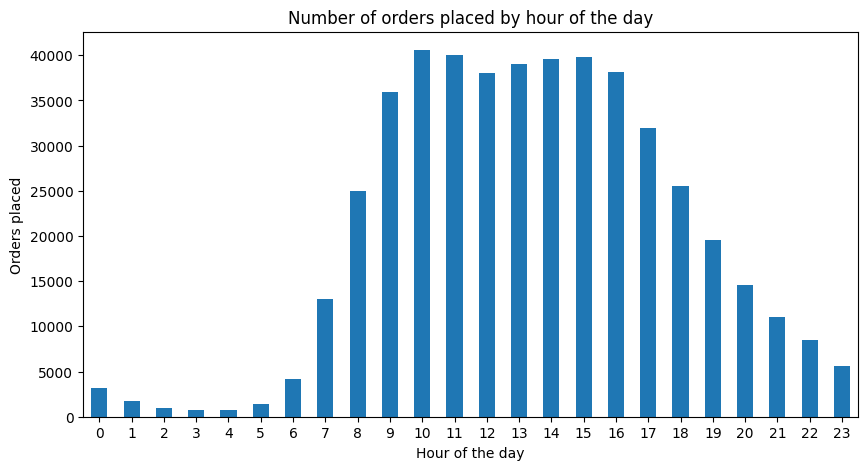

In [45]:
hour_series=orders.sort_values(by='order_hour_of_day')['order_hour_of_day'].value_counts()
hour_series.sort_index(inplace=True)

print()

hour_series.plot(kind='bar',title='Number of orders placed by hour of the day',
       xlabel='Hour of the day', ylabel='Orders placed', rot=0,figsize=[10,5])
plt.show()


Escribe aquí tus conclusiones

**Podemos observar que:**
* Las horas en las que nuestros clientes realizan más compras es entre las 10 y 11:59 del día, así como las 2 y las 3:59 de la tarde. nuestros horarios más inactivos a partir de las 9pm y hasta las 6am.

**estos comportamientos pueden deberse a que los clientes suelen hacer sus compras durante el desayuno o la comida, siendo un pequeño tiempo libre durante su día para resolver sus compras pendientes de la semana/mes**

### [A3] ¿Qué día de la semana compran víveres las personas?

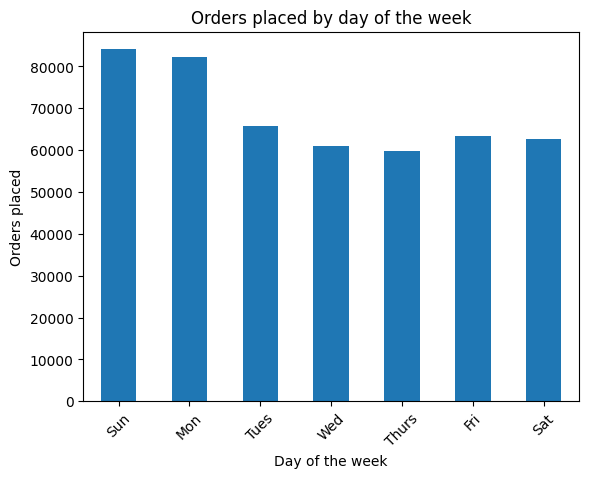

In [46]:
#print(orders.head())
day=orders['order_dow'].sort_values().value_counts()
day.sort_index(inplace=True)
index_val=['Sun','Mon', 'Tues','Wed','Thurs','Fri','Sat']
day = day.set_axis(index_val)



day.plot(kind='bar',title='Orders placed by day of the week',
         xlabel='Day of the week', ylabel='Orders placed',rot=45)

plt.show()

Escribe aquí tus conclusiones

**Podemos observar que:**
* Los días en los que nuestros clientes realizan más compras son los Domingos y Lunes, el día más inactivo es el Jueves.

**estos comportamientos pueden deberse a que los clientes suelen hacer sus compras durante el principal día no laboral (Domingo) o inicio de semana (Lunes) para resolver sus compras pendientes de la semana/mes**

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

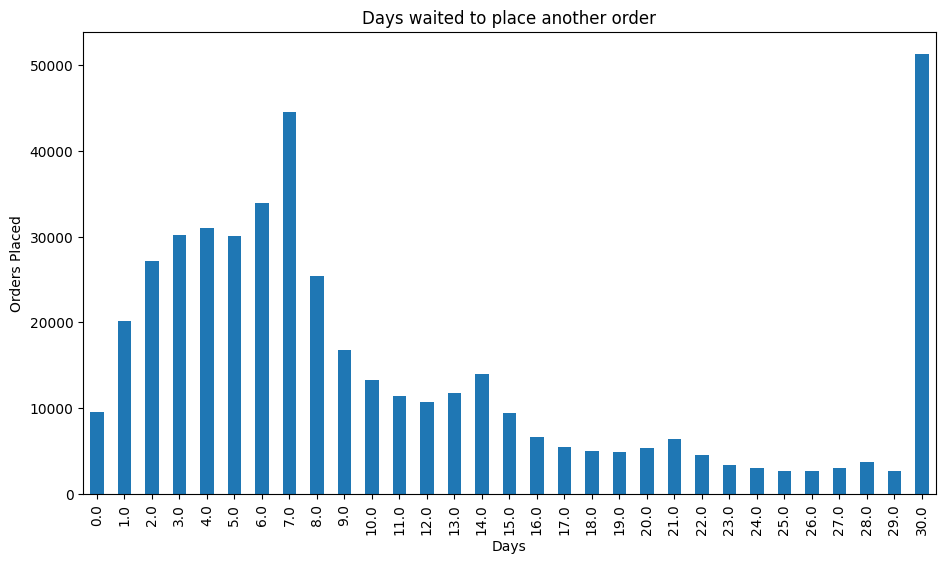

In [47]:
ord=orders['days_since_prior_order'].sort_values().value_counts()
ord.sort_index(inplace=True)


ord.plot(kind='bar',title='Days waited to place another order',
         xlabel='Days',ylabel='Orders Placed',figsize=[11,6])

plt.show()

Escribe aquí tus conclusiones

**Podemos observar que la mayoría de nuestros clientes realizan sus compras con una frecuencia mensual (cada 30 días), seguido por  semanal (cada 7días) y por último cada 6 días.**

* El valor Máximo es una frecuencia de 30 días debido a que nuestros clientes utilizan la aplicación para resurtir sus víveres de manera mensual
* el valor Mínimo es una frecuencia de 29 días, posiblemente debido a que no sincroniza con ninguna frecuencia de pago de salarios (mensual, quincenal, semanal) y posiblemente porque nuestros clientes tienen poco presupuesto en esos periodos

**esto puede obedecer a la frecuencia de pago de salario en sus trabajos o la organización de su vida familiar**

# [B]

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [48]:

day_4 = orders.query("order_dow == 4")
day_6= orders.query("order_dow == 6")

day_4= day_4[['order_hour_of_day']]
day_4=day_4.sort_values(by='order_hour_of_day')
day_4=day_4.value_counts().sort_index()


day_6= day_6[['order_hour_of_day']]
day_6=day_6.sort_values(by='order_hour_of_day')
day_6=day_6.value_counts().sort_index()


In [49]:
day_6.rename('Saturday',inplace=True)
day_4.rename('Wednesday',inplace=True)

order_hour_of_day
0                     324
1                     229
2                     114
3                     109
4                     100
5                     198
6                     594
7                    1787
8                    3136
9                    4332
10                   4938
11                   4842
12                   4433
13                   4567
14                   4795
15                   4795
16                   4788
17                   4089
18                   3379
19                   2691
20                   2037
21                   1506
22                   1236
23                    791
Name: Wednesday, dtype: int64

In [50]:
mdf=pd.merge(day_4,day_6, left_index=True, right_index=True)

mdf.reset_index(inplace=True,drop=True)

<AxesSubplot:title={'center':'Orders by hour on Wednesday and Saturday'}, xlabel='Hours of the day', ylabel='Orders placed'>

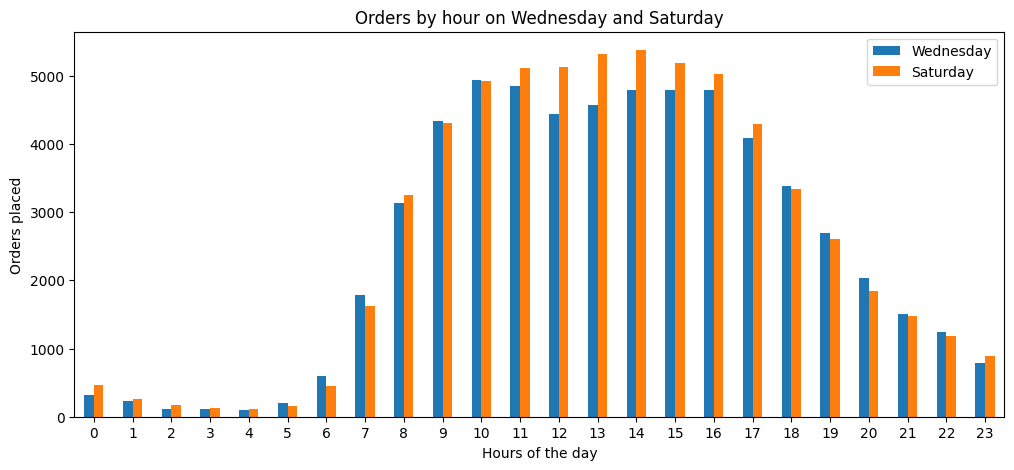

In [51]:
mdf.plot(kind='bar',rot=0,title='Orders by hour on Wednesday and Saturday',
        xlabel='Hours of the day',ylabel='Orders placed',figsize=[12,5])

Escribe aquí tus conclusiones
**Podemos observar que:**
* los Miércoles los clientes suelen realizar sus pedidos entre las 10am y 11:59am, esto puede deberse a que es un día hábil y suelen hacer sus compras durante el desayuno o en algún momento libre durante el trabajo
* los Sábados los clientes suelen realizar sus compras entre las 11am y 14:59pm, esto puede deberse a que es un día de descanso laboral y aprovechan para resolver sus necesidades de compras durante el tiempo libre.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [52]:
df_orders =orders.groupby('user_id').count().sort_values(by='order_id')

print(df_orders[df_orders['order_id']<5])

         order_id  order_number  order_dow  order_hour_of_day  \
user_id                                                         
152331          1             1          1                  1   
139876          1             1          1                  1   
60408           1             1          1                  1   
139873          1             1          1                  1   
139871          1             1          1                  1   
...           ...           ...        ...                ...   
47490           4             4          4                  4   
108687          4             4          4                  4   
142035          4             4          4                  4   
21024           4             4          4                  4   
181950          4             4          4                  4   

         days_since_prior_order  
user_id                          
152331                        1  
139876                        1  
60408             

Text(0, 0.5, 'Frequency of orders placed')

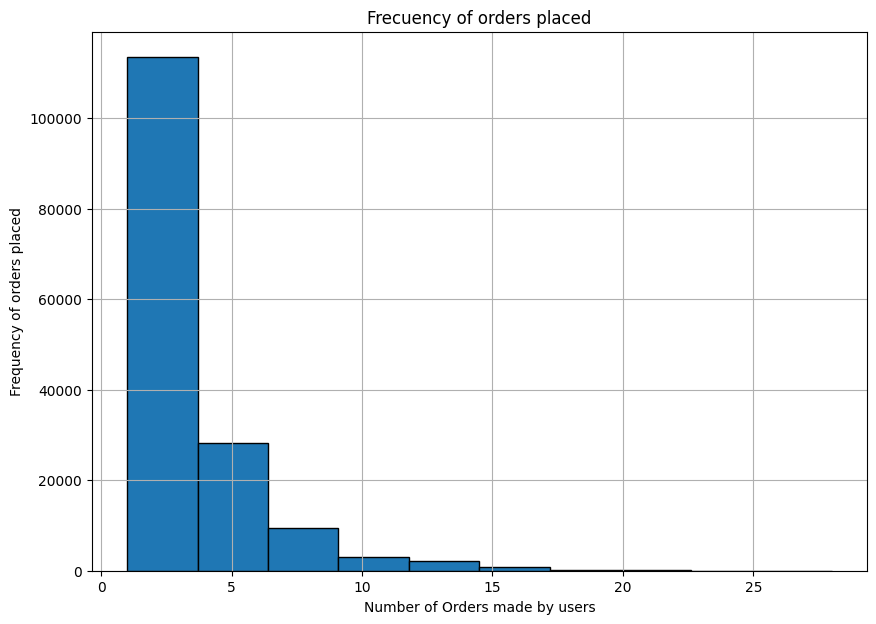

In [53]:
df_orders['order_id'].hist(edgecolor='black',figsize=[10,7])
plt.title('Frecuency of orders placed')
plt.xlabel('Number of Orders made by users')
plt.ylabel('Frequency of orders placed')

Escribe aquí tus conclusiones

**Podemos observar que la mayoría de los clientes realiza entre 1 y 4 pedidos  esto por la Frecuencia observada mayor a 100,000 veces, esto podría indicar que la mayor parte de los clientes son relativamente nuevos y están construyendo lealtad con la plataforma** 

**Nota**
* si tuvieramos información respecto a cuantos clientes están activos (no dados de baja) en el momento del estudio, podríamos determinar si la cantidad alta de usuarios que realizan entre 1 y 4 pedidos son porque están construyendo lealtad, o por el contrario, son porque los clientes no realizan más de 4 pedidos y abandonan la plataforma

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [54]:
merged_df= pd.merge(order_products, products, on='product_id')

print(merged_df.isna().any())
print()
print(merged_df.head(5))

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
product_name         False
aisle_id             False
department_id        False
dtype: bool

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
4   1728338       11440                 23          0   

                     product_name  aisle_id  department_id  
0  CHICKEN BREAST TENDERS BREADED       129              1  
1  CHICKEN BREAST TENDERS BREADED       129              1  
2  CHICKEN BREAST TENDERS BREADED       129              1  
3  CHICKEN BREAST TENDERS BREADED       129              1  
4  CHICKEN BREAST TENDERS BREADED       129              1  


In [55]:
top_20=merged_df.groupby(by='product_id').count().sort_values(by='order_id',ascending=False)
top_serie=top_20['order_id']
print(top_serie.head(5))


product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
Name: order_id, dtype: int64


In [56]:
prod_test =products[['product_id','product_name']]
merged_top= pd.merge(prod_test,top_serie ,left_on='product_id',right_index=True)

print(merged_top.sort_values(by='order_id', ascending=False).reset_index()[['product_id','product_name']].head(20))


    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


Escribe aquí tus conclusiones

**Podemos observar que el producto más vendido son las 'bananas' y dentro del top 20 de productos la mayoría son víveres y consumibles**

# [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [57]:
order_df=order_products.groupby(by='order_id').count().sort_values(by='product_id').reset_index(drop=True)
print(order_df)

print(order_df[order_df['product_id']<14])

        product_id  add_to_cart_order  reordered
0                1                  1          1
1                1                  1          1
2                1                  1          1
3                1                  1          1
4                1                  1          1
...            ...                ...        ...
450041          98                 98         98
450042         104                104        104
450043         108                108        108
450044         115                115        115
450045         127                127        127

[450046 rows x 3 columns]
        product_id  add_to_cart_order  reordered
0                1                  1          1
1                1                  1          1
2                1                  1          1
3                1                  1          1
4                1                  1          1
...            ...                ...        ...
335648          13                 13     

Text(0, 0.5, 'Quantity of orders placed')

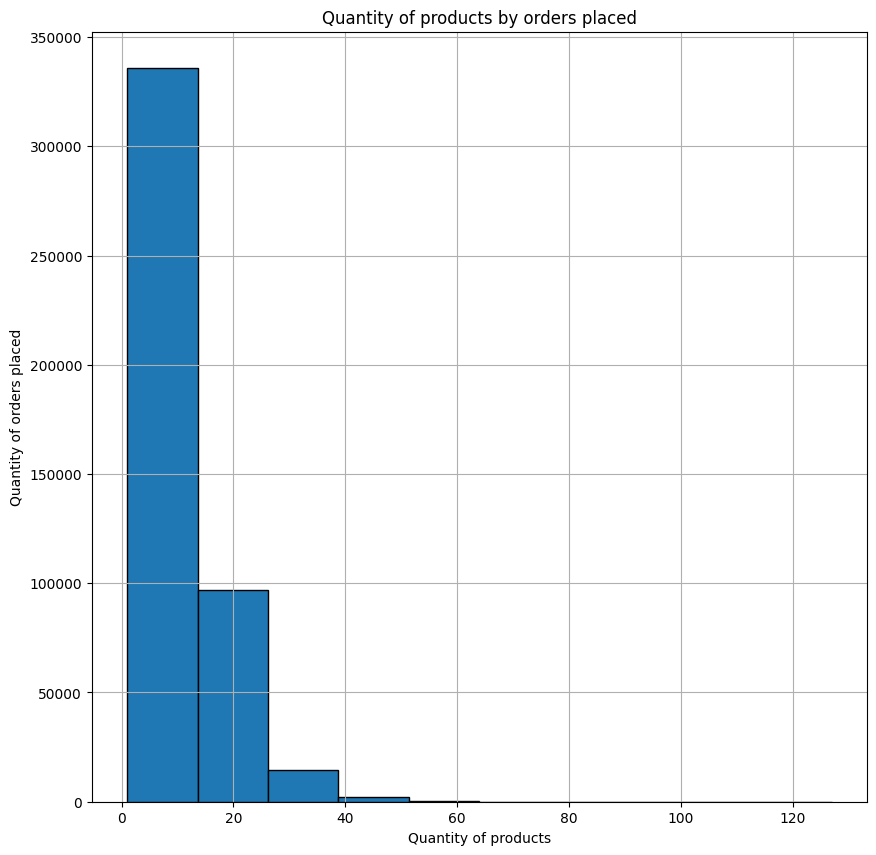

In [58]:
order_df['product_id'].hist(figsize=[10,10],edgecolor='black')
plt.title('Quantity of products by orders placed')
plt.xlabel('Quantity of products')
plt.ylabel('Quantity of orders placed')

Escribe aquí tus conclusiones

**Podemos observar que la mayoría de los clientes ingresa menos de 15 productos en sus pedidos, observamos una frecuencia mayor a 325,000 pedidos con menos de 15 productos, seguido por ceerca de 100,000 pedidos con menos de 25 productos**

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [59]:
#Filtramos del dataframe merged los product_id que si hayan sido reordenados
reordered = merged_df[merged_df['reordered']==1]
print(reordered.head())


   order_id  product_id  add_to_cart_order  reordered  \
1    147172       11440                  7          1   
2   3341719       11440                  4          1   
3   1938779       11440                  8          1   
7    331884       11440                  5          1   
8   1869056       11440                 12          1   

                     product_name  aisle_id  department_id  
1  CHICKEN BREAST TENDERS BREADED       129              1  
2  CHICKEN BREAST TENDERS BREADED       129              1  
3  CHICKEN BREAST TENDERS BREADED       129              1  
7  CHICKEN BREAST TENDERS BREADED       129              1  
8  CHICKEN BREAST TENDERS BREADED       129              1  


In [60]:
#agrupamos el dataframe por product_id y contamos las incidencias
reordered=reordered.groupby('product_id').count().sort_values(by='reordered',ascending=False).head(20)

print(reordered.head())

            order_id  add_to_cart_order  reordered  product_name  aisle_id  \
product_id                                                                   
24852          55763              55763      55763         55763     55763   
13176          44450              44450      44450         44450     44450   
21137          28639              28639      28639         28639     28639   
21903          26233              26233      26233         26233     26233   
47209          23629              23629      23629         23629     23629   

            department_id  
product_id                 
24852               55763  
13176               44450  
21137               28639  
21903               26233  
47209               23629  


In [61]:
#generamos una serie del dataframe anterior donde conservamos el product_id (indice) y la cuenta de incidencias
reordered_serie= reordered['order_id']
print(reordered_serie.head())

product_id
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
Name: order_id, dtype: int64


In [62]:
#imprimimos el merged df ordenando los valores de manera descendente y conservando solo su nombre y product id
prod_test =products[['product_id','product_name']]
merged_top_reordered= pd.merge(prod_test,reordered_serie ,left_on='product_id',right_index=True)
print(merged_top_reordered.sort_values(by='order_id', ascending=False).reset_index()[['product_id','product_name']].head(20))

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF




**podemos observar que la mayoría de víveres son los productos que se vuelven a ordenar, cabe mencionar que observamos que la mayoría de los artículos top 20 vendidos , son los top 20 que se vuelven a ordenar, sin embargo hay algunos cambios en la frecuencia de orden así como algunos pocos artículos que no figuran en el top 20 más vendidos, pero sin en el top 20 más reordenados**

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [63]:
orders_merged = pd.merge(merged_df,orders,on='order_id')

In [64]:
piv_orders_merged=orders_merged[['product_name','reordered','product_id']]

pivot_df =piv_orders_merged.pivot_table(index='product_name',
                          columns='reordered',
                            values='product_id',
                          aggfunc='count')

pivot_df=pivot_df.dropna(axis=0)
pivot_df['reordered_rate']=pivot_df[1]/(pivot_df[0] +pivot_df[1])
print(pivot_df.head())
print(pivot_df['reordered_rate'].mean())



reordered                                        0     1  reordered_rate
product_name                                                            
#2 COFFEE FILTERS                             82.0  28.0        0.254545
#4 NATURAL BROWN COFFEE FILTERS               25.0  14.0        0.358974
& GO! HAZELNUT SPREAD + PRETZEL STICKS         8.0   7.0        0.466667
+ENERGY BLACK CHERRY VEGETABLE & FRUIT JUICE   4.0   3.0        0.428571
0 CALORIE ACAI RASPBERRY WATER BEVERAGE        5.0   7.0        0.583333
0.46014896771560676


Text(0, 0.5, 'Frequency of products')

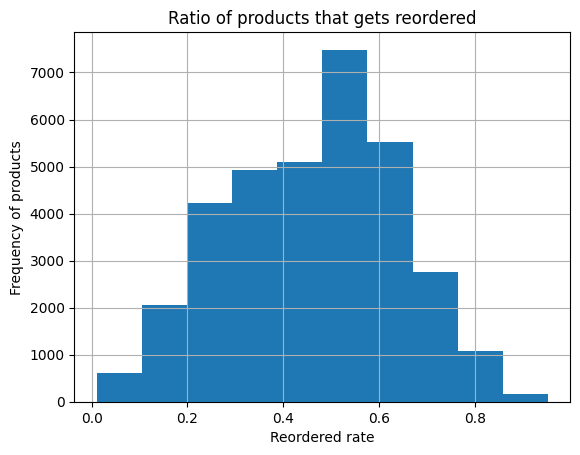

In [65]:
pivot_df['reordered_rate'].hist()
plt.title('Ratio of products that gets reordered')
plt.xlabel('Reordered rate')
plt.ylabel('Frequency of products')

Escribe aquí tus conclusiones

**Podemos observar que la mayor parte de los productos se reordenan con una taza entre el 45% a 55% , observamos aproximadamente 7500 productos con este comportamiento**

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [66]:
piv_orders_merged_2=orders_merged[['product_name','reordered','product_id','user_id']]

pivot_df_2 =piv_orders_merged_2.pivot_table(index='user_id',
                          columns='reordered',
                            values='product_id',
                          aggfunc='count')

pivot_df_2=pivot_df_2.dropna(axis=0)
pivot_df_2['reordered_rate']=pivot_df_2[1]/(pivot_df_2[0] +pivot_df_2[1])
print(pivot_df_2.head())
print(pivot_df_2['reordered_rate'].mean())

reordered     0     1  reordered_rate
user_id                              
2          25.0   1.0        0.038462
5           4.0   8.0        0.666667
7           1.0  13.0        0.928571
11         12.0   3.0        0.200000
12          9.0   3.0        0.250000
0.5281246130162509


Text(0, 0.5, 'Frequency of clients')

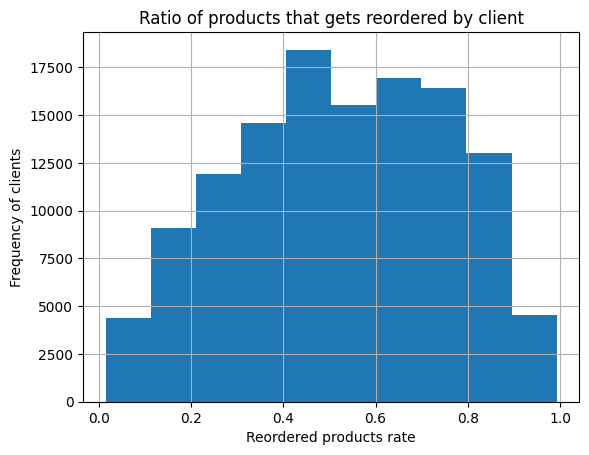

In [67]:
pivot_df_2['reordered_rate'].hist()
plt.title('Ratio of products that gets reordered by client')
plt.xlabel('Reordered products rate')
plt.ylabel('Frequency of clients')

Escribe aquí tus conclusiones

**Podemos observar que aproximadamente el 45% a 55% de los productos pedidos por cada cliente son reordenados, teniendo una frecuencia superior a las 175,000 incidencias**

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [68]:
print(orders_merged.head(5))

   order_id  product_id  add_to_cart_order  reordered  \
0   2141543       11440                 17          0   
1   2141543       24561                 13          1   
2   2141543       13176                  2          1   
3   2141543       31869                 15          1   
4   2141543       16759                  5          1   

                     product_name  aisle_id  department_id  user_id  \
0  CHICKEN BREAST TENDERS BREADED       129              1    58454   
1     ORGANIC CHEESE FROZEN PIZZA        79              1    58454   
2          BAG OF ORGANIC BANANAS        24              4    58454   
3                 ORGANIC EDAMAME       116              1    58454   
4            ORGANIC CARROT BUNCH        83              4    58454   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  
0            25          0                 15                     8.0  
1            25          0                 15                     8.0  
2            2

In [69]:
first_added= orders_merged[orders_merged['add_to_cart_order']==1]
first_added =first_added.groupby('product_id').count().sort_values(by='order_id',ascending=False).head(20)
first_added_series= first_added['order_id']
print(first_added_series)


product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: order_id, dtype: int64


In [70]:
prod_test =products[['product_id','product_name']]
merged_first_added= pd.merge(prod_test,first_added_series ,left_on='product_id',right_index=True).sort_values(by='order_id',ascending=False).reset_index()
print(merged_first_added[['product_id','product_name']])

    product_id                 product_name
0        24852                       BANANA
1        13176       BAG OF ORGANIC BANANAS
2        27845           ORGANIC WHOLE MILK
3        21137         ORGANIC STRAWBERRIES
4        47209         ORGANIC HASS AVOCADO
5        21903         ORGANIC BABY SPINACH
6        47766              ORGANIC AVOCADO
7        19660                 SPRING WATER
8        16797                 STRAWBERRIES
9        27966          ORGANIC RASPBERRIES
10       44632   SPARKLING WATER GRAPEFRUIT
11       49235          ORGANIC HALF & HALF
12       47626                  LARGE LEMON
13         196                         SODA
14       38689     ORGANIC REDUCED FAT MILK
15       26209                        LIMES
16       12341                HASS AVOCADOS
17        5785  ORGANIC REDUCED FAT 2% MILK
18       27086                  HALF & HALF
19       43352                  RASPBERRIES


Escribe aquí tus conclusiones

**Podemos observar que las 'bananas' siguen siendo el producto preferido por los clientes, incluso para ser el primero en ser depositado en el carrito de compras, podemos observar que la lista de los top 20 productos primeros en ser ordenados, tiene una buena similitud con los top 20 productos pedidos en general**

### Conclusion general del proyecto:

**En este proyecto exploramos diferentes puntos muy importantes del análisis de datos, comenzamos con la lectura normalización de los datos, realizamos partes fundamentales el proceso ETL ,tratando valores duplicados, ausentes y normalización de variables, me pareció muy retador e interesante trabajar con datos reales y "sin tanta" ayuda, debido a que no sabía si los datos filtrados que estaba obteniendo eran correctos o incorrectos.**


**Puntualmente respecto al análisis realizado, pudimos observar que nuestros clientes:**
* Suelen realizar sus compras los Domingos y Lunes
* Utilizan la plataforma en su mayoría para hacer compras de víveres
* Suelen comprar durante la mañana o las primeras horas de la tarde
* Suelen comprar con una frecuencia de 7,14 y 30 días
* La mayoría de ellos ha realizado menos de 5 pedidos

**También observamos que:**

* La taza de reorden de los productos oscila en un 46
* La taza de reorden de los productos por orden de cliente oscila en un 52
* Tuvimos algunas discrepancias en el sistema el miércoles a las 2am lo que ocasionó que algunas órdenes se repitieran
* Dentro de los principales productos observamos que la Banana es el producto preferido de los clientes
* La mayoría de clientes suele pedir menos de 15 productos por orden
* El producto que más se reordena es la Banana
* El producto que los clientes añaden primero en el carrito es la Banana


**######Nota########**


Decidí añadir la sección 2.1 debido a que me hacía sentido realizar ese análisis previo respecto a los pasillos y departamentos con valores 'missing' para poder llegar a las primeras conclusiones de manera adecuada, sin embargo desarrollo los mismos puntos más adelante en el orden que se sugiere.
